In [30]:
import pandas as pd
import matplotlib.pyplot as plt #plotting
import sklearn #machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston #data from sklearn library
from sklearn.metrics import mean_squared_error, r2_score #metrics: accuracy

In [31]:

#read the dataset
boston = load_boston()


print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)


print(boston.DESCR)



dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bos

In [32]:

#read the data to a dataframe
bos = pd.DataFrame(boston.data) #read the data pandas dataframe

print(bos.head()) #print the top 5 rows

bos.columns = boston.feature_names #assigining the column names

bos['PRICE'] = boston.target #price [predict]

print(bos.head())


         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  

In [33]:
bos.head()
##Tell me: which is my x data and which is y_data?


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:

X = bos.drop('PRICE', axis = 1) #drop price column from dataframe

Y = bos['PRICE'] #assigning the price column to y

#Split the dataset in to training and testing
#100 rows, split the the data in to training (80%) is used for training the model
#and 20% for x_data and we use model.predict(test_data) - y prediction , y actual data
#calculate the accuracy

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.20, random_state = 10000) #seeding

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(404, 13)
(102, 13)
(404,)
(102,)


In [35]:
lm = LinearRegression()
lm.fit(X_train, Y_train) #create a mapping function between xdata and y data


LinearRegression()

In [36]:
print(lm.predict(X_test)) #input is  (102,13), output is 102 rows and 1 column

[35.65433615 10.04166411 34.05752445 17.8832547  16.12463899 23.50157878
 24.56966938 32.8632891  12.77112579 15.83473072 17.91393953 40.20255154
 12.33071659 23.77051193 21.27272851 26.33271469 23.19432645  0.04927367
 23.98526637 28.97183373 18.30035426 13.81205748 21.74532007 32.52954648
 20.52037324 20.47818598 24.55639135 24.98891895 18.4774561  38.83865857
 16.03447277 15.06316064 21.61761303 16.59391323 10.17363778 30.06650579
 29.97136831 14.49076702 21.14651704 19.00947646 28.8112651  19.92921416
 34.90618162 12.45763211 22.83673638 14.27615109 38.35248837 30.72990678
 21.17062921 27.19104891 28.41475686 28.22027573 22.71526499 18.31211788
 42.31751994 35.93746099 16.11452     5.97382056  7.00704738 27.84119073
 19.21231262 12.86862065 30.97579627 40.66309978 37.19885707 17.63011919
 17.14559554 20.88267357 21.94065828 18.40229066 24.9051322  17.39641758
 17.17639923 15.29681734 22.58947549 27.07816154 28.68046501 20.44376133
 25.11448574 30.47155945 20.36875927 18.80623483 15

In [37]:
Y_train_pred = lm.predict(X_train) #training data

Y_test_pred = lm.predict(X_test) #testing data

##SCENARIO 1: TAKE ALL DATA FOR TRAINING
#SHARE MARKET - LAST 10 YEARS DATA



df=pd.DataFrame(Y_test_pred,Y_test)
print(df)


               0
PRICE           
36.5   35.654336
23.1   10.041664
34.9   34.057524
20.8   17.883255
23.1   16.124639
...          ...
18.8   20.776794
20.6   16.573291
23.3   25.392592
15.1   16.897056
13.1   15.613266

[102 rows x 1 columns]


test_data 30.632326491552675
training_Data 19.941101267556718


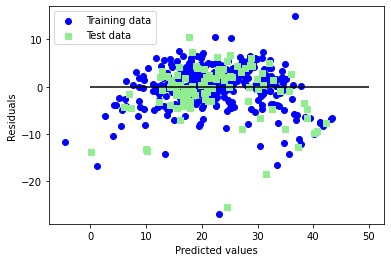

In [46]:
mse = mean_squared_error(Y_test, Y_test_pred) #
print("test_data", mse)

mse_train = mean_squared_error(Y_train,Y_train_pred)
print("training_Data", mse_train)
#model 1: mean squared error is 30.98
#model 2: mean squared error is 36.98
#model 3: mean squared error is 26.23

#lesser the mean squared error better the accuracy of the model


#residual = difference between actual and prediction
plt.scatter(Y_train_pred, Y_train_pred - Y_train,c='blue',marker='o',label='Training data')
plt.scatter(Y_test_pred, Y_test_pred - Y_test,c='lightgreen',marker='s',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc= 'upper left')
plt.hlines(y=0,xmin=0,xmax=50)
plt.plot()
plt.show()


In [39]:
#import
#read data
#split the data in to x and y
#split the data in training and testing
#use the training data to train the model
#use the test data to test the model - validation accuracy
#use the train data to check accuracy - training accuracy
#-----

#prediction

In [42]:
bos.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64